# 2.4 Схема проекта с отложенной выборкой (разбиением на train test)

Что будем делать:
- получим данные
- сформируем тренировочный и тестовый датасеты
- обучим модель
- оценим результат

## Загрузка данных

In [119]:
import pandas as pd

df = pd.read_csv("data/house_prices.csv")

## Обзор данных

In [120]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [121]:
df.shape

(20000, 9)

## Выделение матрицы объект-признак и целевой переменной

In [122]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

## Разбиение выборки на тренировочную и тестовую части

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Обучение модели на тренировочных данных

In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Предсказание модели на тестовых данных

In [125]:
prediction = model.predict(X_test)

In [126]:
prediction[:10]

array([  3634.54014459, 212458.46103116, 278501.95085509,  70041.88004127,
       304070.89408958, 131388.863149  , 132069.04298239, 415036.94795881,
       356753.34288172, 196207.91156303])

## Вычисление метрики MSE на тестовых данных

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mean_squared_error(y_test, prediction)

4807903806.065134

In [128]:
mean_squared_error(y_test, prediction) ** 0.5

69339.0496478365

In [129]:
print(f'{mean_absolute_percentage_error(y_test, prediction):.2f}')

0.30


# 2.6 Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [131]:
RANDOM_STATE = 42

Загрузим данные.

In [132]:
Data = pd.read_csv("data/titanik.csv", sep=";")

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [133]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
562,563,0,2,Norman; Mr. Robert Douglas,male,28.0,0,0,218629,13.5000,NaN,S
134,135,0,2,Sobey; Mr. Samuel James Hayden,male,25.0,0,0,C.A. 29178,13.0000,NaN,S
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
692,693,1,3,Lam; Mr. Ali,male,NaN,0,0,1601,56.4958,NaN,S
240,241,0,3,Zabour; Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [134]:
len(Data)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [135]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [136]:
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


In [137]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Вопрос:** в скольких категориальных колонках есть пропуски?

In [139]:
categorical = []
for col in Data.columns:
    if Data[col].dtype == object:
        categorical.append(col)
res = 0
for col in categorical:
    if Data[col].isna().sum() > 0:
        res += 1
print(res)

2


### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [140]:
Data['Sex'].value_counts()

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [141]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [142]:
display(Data['Sex'].describe())
Data['Sex'].unique()

count      886
unique       2
top       male
freq       574
Name: Sex, dtype: object

array(['male', 'female'], dtype=object)

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [143]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [144]:
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

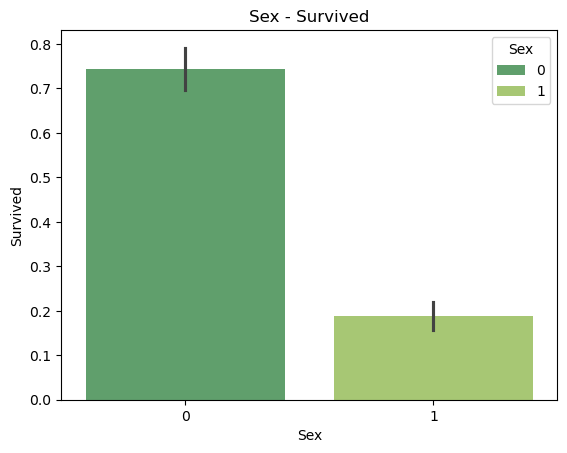

In [145]:
sns.barplot(x='Sex', y='Survived', data=Data, hue='Sex', palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

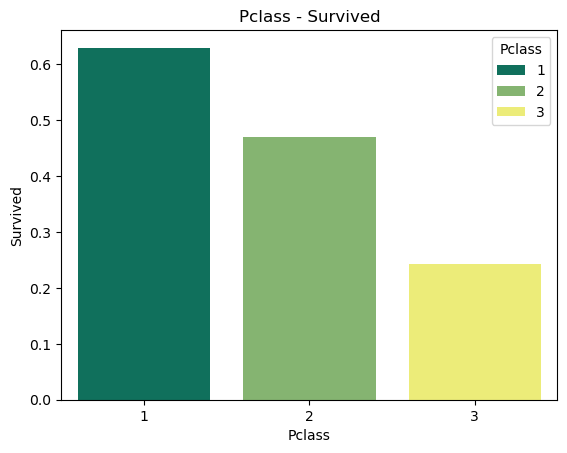

In [146]:
sns.barplot(data=Data, x='Pclass', y='Survived', hue='Pclass', palette='summer', errorbar=None)
plt.title('Pclass - Survived')
plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

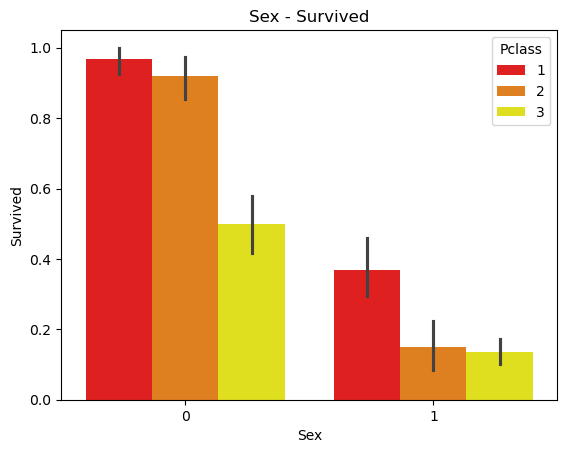

In [147]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [148]:
Data['Embarked'].nunique()

3

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [149]:
del Data['Embarked']

In [150]:
Data.shape

(886, 11)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [151]:
median_age = Data['Age'].median()

Data['Age'] = Data['Age'].fillna(median_age)

Нарисуем распределение возраста пассажиров.

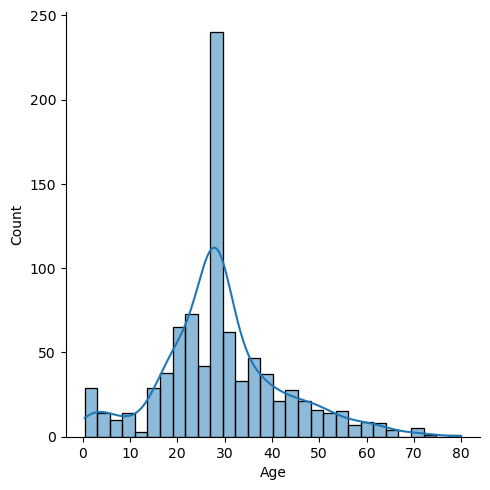

In [152]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [153]:
Data = Data.drop('Fare', axis=1)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [154]:
Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)

После минимальной обработки данных у нас получилась следующая таблица:

In [155]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [156]:
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000


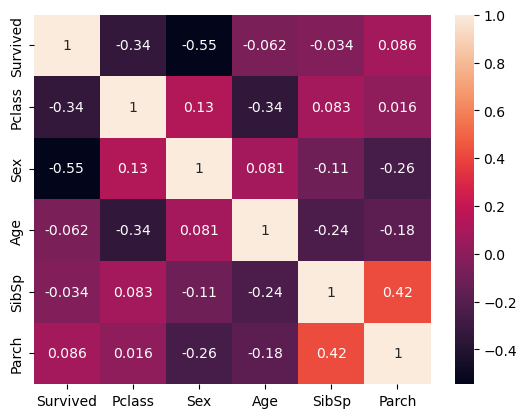

In [157]:
sns.heatmap(data=Data.corr(), annot=True)
plt.show();

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

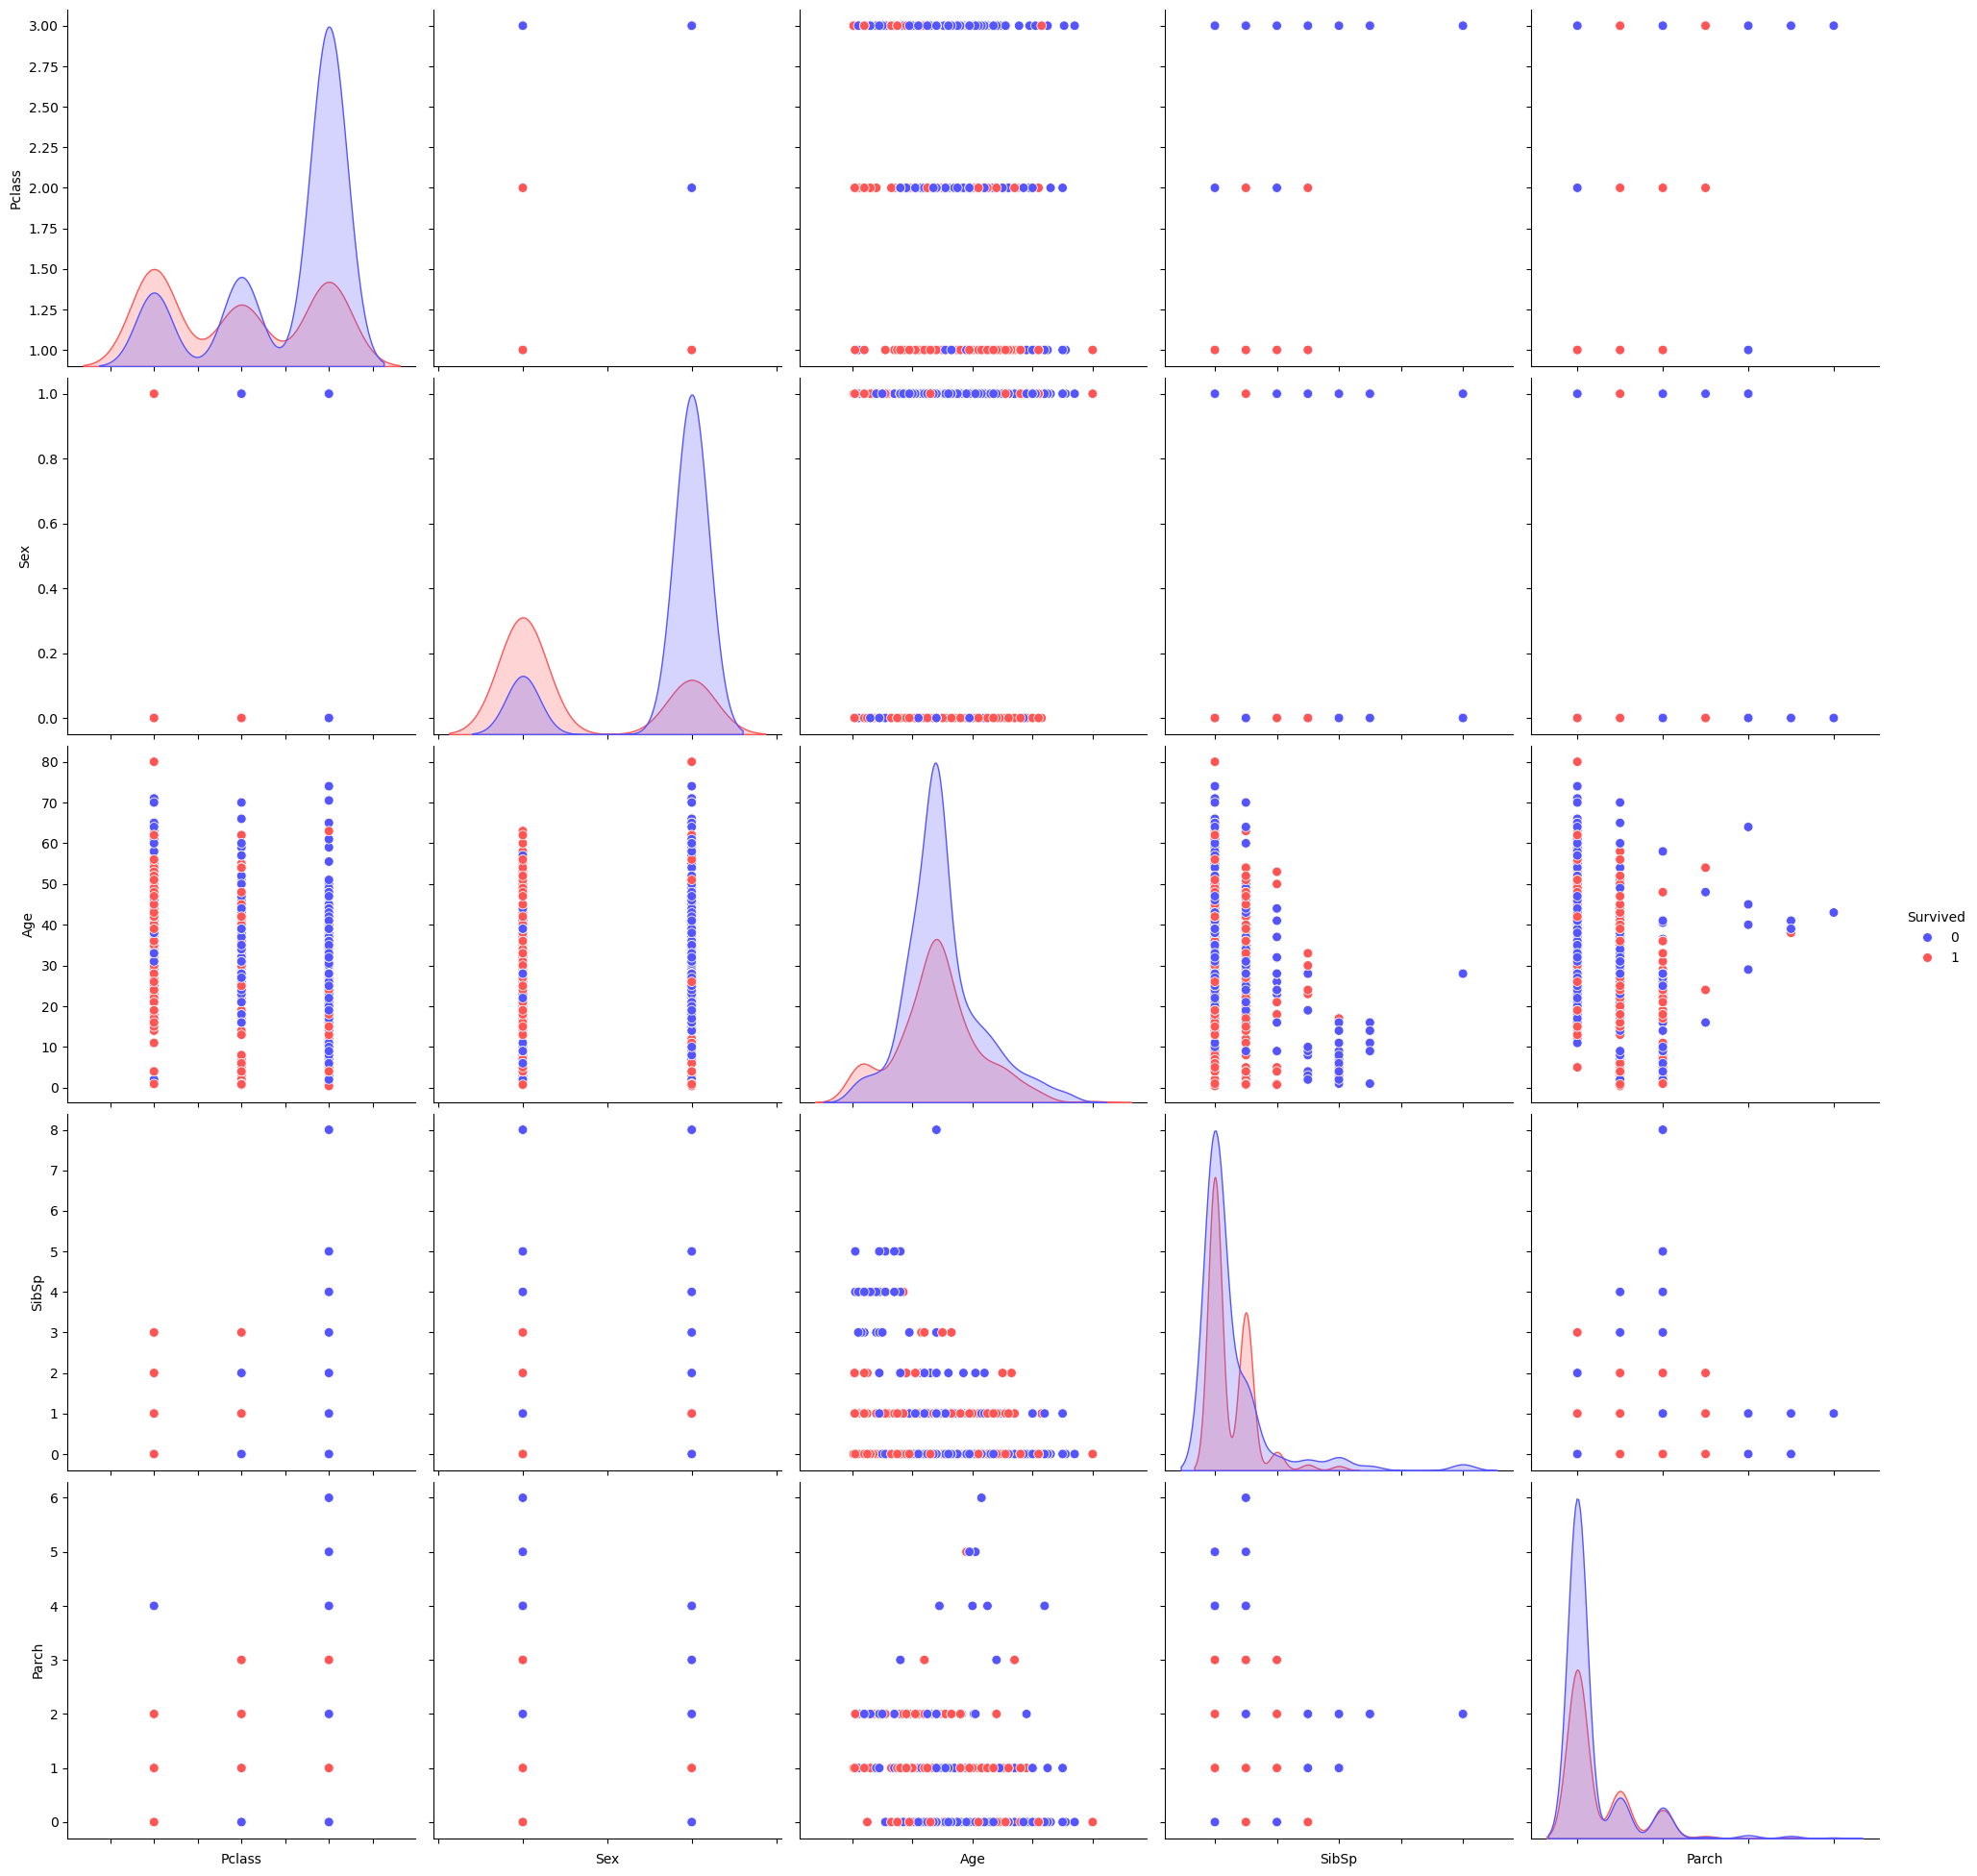

In [158]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [159]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [160]:
# ваш код здесь

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [161]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [162]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [163]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [164]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784

# 2.7  Домашнее задание - 1

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [165]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [166]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [167]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [168]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [169]:
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

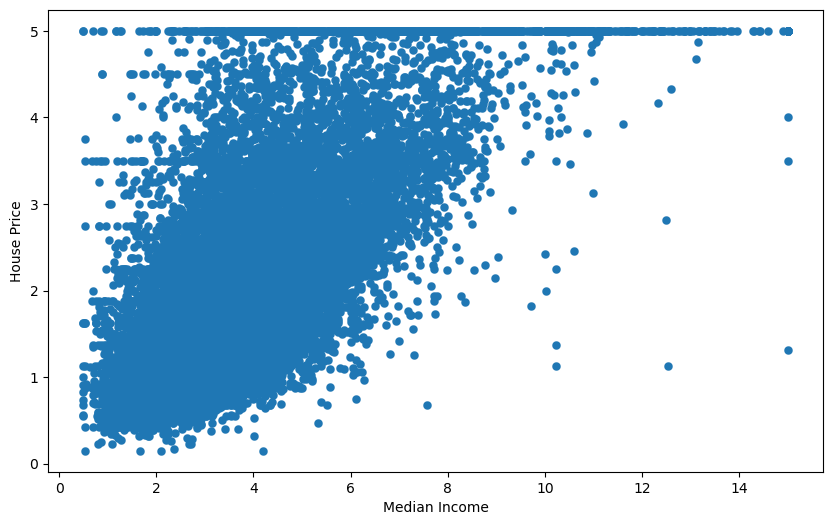

In [170]:
plt.figure(figsize=[10, 6])
plt.scatter(X['MedInc'], y, linewidths=0.1)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show();

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

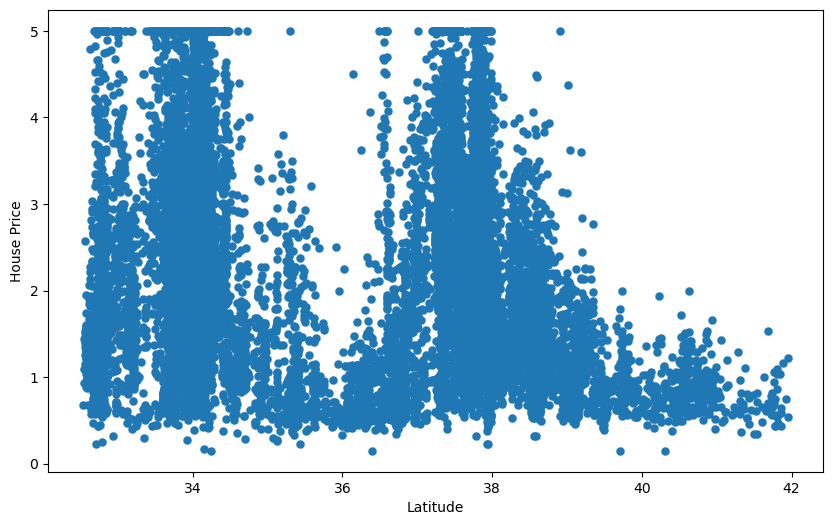

In [171]:
plt.figure(figsize=[10, 6])
plt.scatter(X['Latitude'], y, linewidths=0.1)
plt.xlabel('Latitude')
plt.ylabel('House Price')
plt.show();

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

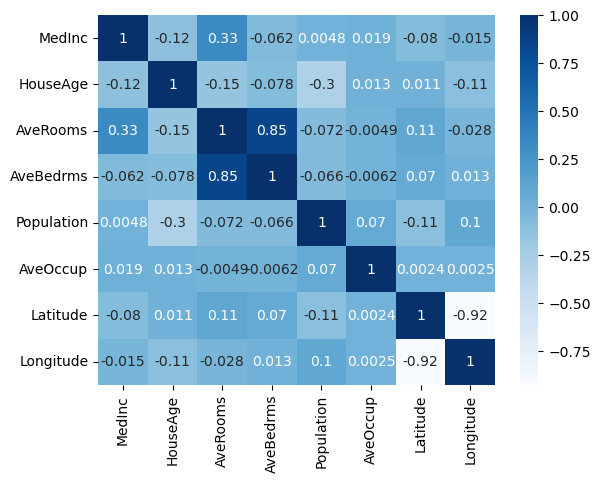

In [172]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [173]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


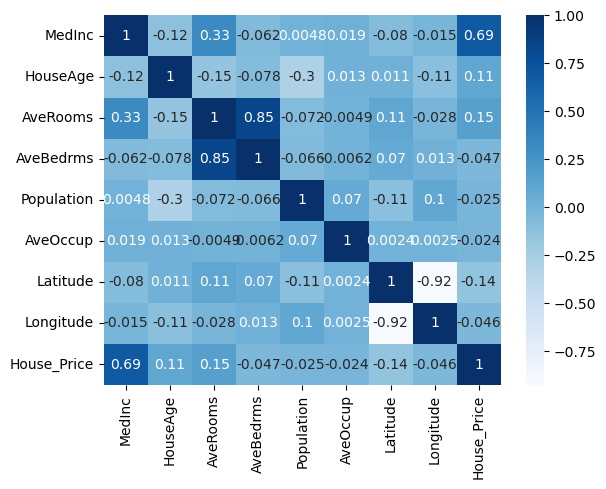

In [174]:
df = X.copy()
df.insert(df.shape[1], 'House_Price', y)
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show();

In [175]:
df.corr().sort_values('House_Price')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
House_Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [176]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

##Задание 4

Сколько объектов попали в тест?

In [177]:
Xtest.shape

(5160, 8)

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [178]:
# ваш код здесь
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(Xtrain, ytrain)

LinearRegression()

In [179]:
# ваш код здесь
ypred = linreg_model.predict(Xtest)
ypred[:10]

array([2.54916369, 1.83067946, 1.91409797, 1.83839242, 1.46891131,
       2.4029965 , 2.02236706, 2.49732862, 3.41083148, 2.22728724])

## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.
Ответ округлите до десятых.

In [180]:
from sklearn.metrics import mean_squared_error

round(mean_squared_error(ytest, ypred), 1)

0.5

# 3.1 Основы линейной регрессии

Будем решать задачу регрессии - предсказывать стоимость домов в Калифорнии.

In [181]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

Загрузим данные.

In [182]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

In [183]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [184]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Обучим модель линейной регрессии на исходных данных.

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [186]:
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mean_squared_error(ytest, pred) ** 0.5

0.7363079043452662

In [188]:
mean_absolute_percentage_error(ytest, pred)

0.31799448766015004

In [189]:
r2_score(ytest, pred)

0.5987368576021102

Добавим полиномиальные признаки второй степени:

$$1, x_1, x_2 \to 1, x_1, x_2, x_1^2, x_2^2, x_1x_2.$$

In [190]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

pf.fit(Xtrain)

Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [191]:
Xtrain_new[:1].shape

(1, 45)

Обучим на обогащенных признаках модель.

In [192]:
model.fit(Xtrain_new, ytrain)

pred2 = model.predict(Xtest_new)

In [193]:
mean_squared_error(ytest, pred2) ** 0.5

0.7977720674607324

In [194]:
mean_absolute_percentage_error(ytest, pred2)

0.2705123777301057

In [195]:
r2_score(ytest, pred2)

0.5289489275244215

In [196]:
Xtrain_new.shape

(15480, 45)

Ошибка уменьшилась!

# 3.6  Домашнее задание - 2

## Описание задачи и загрузка данных

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [388]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [389]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [390]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [392]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [393]:
corr = data.corr(numeric_only=True)
corr.sort_values('price')

,carat,depth,table,price,x,y,z
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249


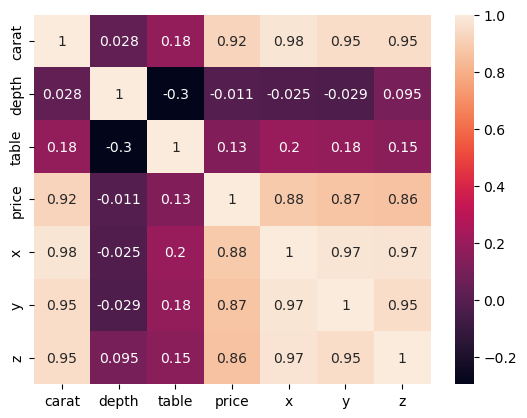

In [394]:
sns.heatmap(data=corr, annot=True)
plt.show();

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [395]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [396]:
categorical = [col for col in data.columns if data[col].dtype == 'object']
print(categorical)

data = pd.get_dummies(data=data, columns=categorical, drop_first=True)

data.head()

['cut', 'color', 'clarity']


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [397]:
data.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [398]:
X = data.drop('price', axis=1)
y = data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [399]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [400]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [401]:
scaler.fit(Xtrain)
Xtrain_scale = scaler.transform(Xtrain)
Xtest_scale = scaler.transform(Xtest)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [402]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg_model = LinearRegression()
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)

r2_score(ytest, ypred)

0.9201866914388087

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [403]:
features = Xtrain.columns
weights = linreg_model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

,Feature,Weight
3,x,-1100.418850
15,color_J,-529.449216
14,color_I,-442.783567
13,color_H,-362.002300
12,color_G,-202.863564
11,color_F,-104.560993
1,depth,-90.173817
10,color_E,-83.640021
2,table,-60.332280
5,z,-34.258945


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [404]:
drop_col = ['y', 'table', 'depth']
Xtrain = Xtrain.drop(drop_col, axis=1)
Xtest = Xtest.drop(drop_col, axis=1)

In [405]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

pf.fit(Xtrain)

PolynomialFeatures()

In [406]:
Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [407]:
scaler = StandardScaler()
scaler.fit(Xtrain_new, ytrain)
Xtrain_scale = scaler.transform(Xtrain_new)
Xtest_scale = scaler.transform(Xtest_new)

In [408]:
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)
r2_score(ypred, ytest)

0.9680888275411034

In [413]:
features = Xtrain.columns
weights = linreg_model.coef_[0]
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

,Feature,Weight
0,carat,-2.076017e-13
17,clarity_VS2,-2.076017e-13
16,clarity_VS1,-2.076017e-13
15,clarity_SI2,-2.076017e-13
14,clarity_SI1,-2.076017e-13
13,clarity_IF,-2.076017e-13
12,color_J,-2.076017e-13
11,color_I,-2.076017e-13
10,color_H,-2.076017e-13
9,color_G,-2.076017e-13


### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

# 4.1 Градиентный спуск для функции одной переменной

In [12]:
a

5